Angelica sinensis:119
Chuanxiong:131
Eucommia ulmoides:119
Ginseng:135
Wolfberry:119


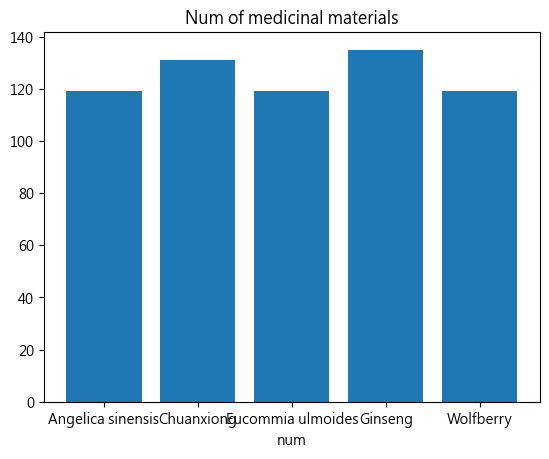

In [24]:
import os
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
from matplotlib import rc

rc("font", family="Microsoft JhengHei")

def read_flower_data(folder_name):
    folders = os.listdir(folder_name)
    names = []
    nums = []
    for folder in folders:
        folder_path = os.path.join(folder_name, folder)
        images = os.listdir(folder_path)
        images_num = len(images)
        print("{}:{}".format(folder, images_num))
        names.append(folder)
        nums.append(images_num)

    return names, nums


def show_bar(x, y):
    plt.xlabel("num")
    plt.bar(x, y)
    plt.title("Num of medicinal materials")
    plt.show()


if __name__ == "__main__":
    x, y = read_flower_data("./image/")
    show_bar(x, y)

Found 623 files belonging to 5 classes.
Using 499 files for training.
Found 623 files belonging to 5 classes.
Using 124 files for validation.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.7984 - loss: 0.5869 - val_accuracy: 0.9839 - val_loss: 0.1051
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9914 - loss: 0.0595 - val_accuracy: 0.9758 - val_loss: 0.0820
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9878 - loss: 0.0408 - val_accuracy: 0.9919 - val_loss: 0.0620
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9868 - loss: 0.0460 - val_accuracy: 0.9919 - val_loss: 0.0610
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.9837 - loss: 0.0318 - val_accuracy: 0.9919 - val_loss: 0.0563
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9881 - loss: 0.0200 - val_accuracy: 0.9919 - val_loss: 0.0518
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9876 - loss: 0.0306 - val_accuracy: 0.9919 - val_loss: 0.0544
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9898 - loss: 0.0302 - 

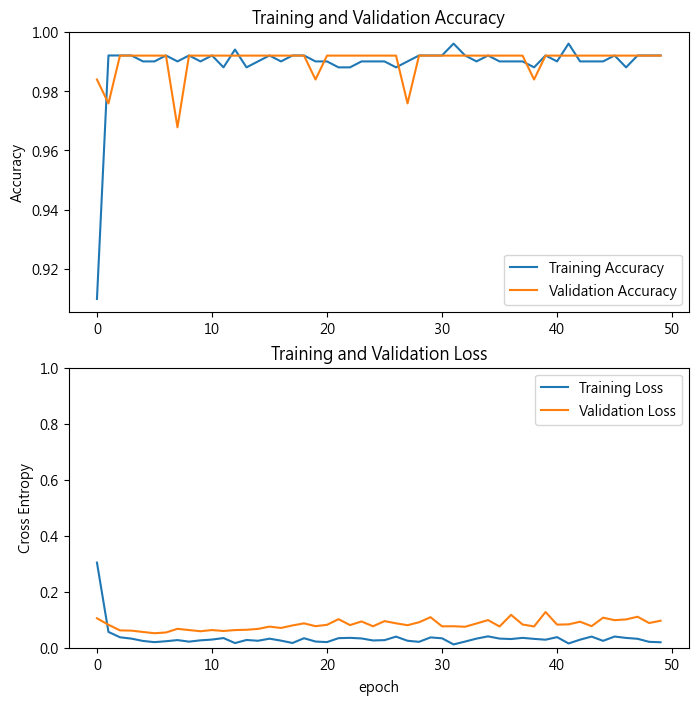

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


def data_load(data_dir, img_height, img_width, batch_size):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode="categorical",
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode="categorical",
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    class_names = train_ds.class_names

    return train_ds, val_ds, class_names


def model_load(IMG_SHAPE=(224, 224, 3), is_transfer=False):
    if is_transfer:
        base_model = tf.keras.applications.MobileNetV2(
            input_shape=IMG_SHAPE,
            include_top=False,
            weights="imagenet")
        base_model.trainable = False
        model = tf.keras.models.Sequential([
            tf.keras.layers.Rescaling(
                1./127.5, offset=-1, input_shape=IMG_SHAPE),
            base_model,
            tf.keras.layers.GlobalAveragePooling2D(),

            tf.keras.layers.Dense(5, activation="softmax")
        ])

    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.experimental.preprocessing.Rescaling(
                1. / 255, input_shape=IMG_SHAPE),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Flatten(),

            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(5, activation="softmax")
        ])

    model.summary()
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy", metrics=["accuracy"])
    return model


def show_loss_acc(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label="Training Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.ylabel("Accuracy")
    plt.ylim([min(plt.ylim()), 1])
    plt.title("Training and Validation Accuracy")

    plt.subplot(2, 1, 2)
    plt.plot(loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.ylabel("Cross Entropy")
    plt.ylim([0, 1.0])
    plt.title("Training and Validation Loss")
    plt.xlabel("epoch")
    plt.show()


def train(epochs, is_transfer=False):
    train_ds, val_ds, class_names = data_load(
        "./image", 224, 224, 4)
    model = model_load(is_transfer=is_transfer)
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)
    if is_transfer:
        model.save("models/mobilenet.h5")
    show_loss_acc(history)


train(epochs=50, is_transfer=True)

In [ ]:

def load_test_data(data_dir, img_height, img_width, batch_size):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode="categorical",
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        label_mode="categorical",
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    class_names = train_ds.class_names

    return train_ds, val_ds, class_names



def test(is_transfer=True):
    train_ds, val_ds, class_names = load_test_data(
        "./image/", 224, 224, 4)
    if is_transfer:
        model = tf.keras.models.load_model("./models/mobilenet.h5")
    model.summary()
    loss, accuracy = model.evaluate(val_ds)
    print("Test accuracy :", accuracy, loss)


test(True)


Found 167 files belonging to 7 classes.
Using 134 files for training.
Found 167 files belonging to 7 classes.
Using 33 files for validation.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,953 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 1.0000 - loss: 0.0064
Test accuracy : 1.0 0.0047538704238832


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image


class ChineseHerbDataset(Dataset):
    """
    Custom Dataset for loading Chinese herb images
    """

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the herb images
            transform (callable, optional): Optional transform to be applied on a sample
        """
        self.herb_images = []
        self.herb_labels = []
        self.class_to_idx = {}

        # Build the dataset by scanning the directory
        for i, herb_name in enumerate(os.listdir(root_dir)):
            herb_path = os.path.join(root_dir, herb_name)

            # Ensure it's a directory
            if os.path.isdir(herb_path):
                self.class_to_idx[herb_name] = i

                # Collect image paths for this herb
                for img_name in os.listdir(herb_path):
                    img_path = os.path.join(herb_path, img_name)
                    if img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                        self.herb_images.append(img_path)
                        self.herb_labels.append(i)

        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
                                 0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.herb_images)

    def __getitem__(self, idx):
        img_path = self.herb_images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.herb_labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


class HerbClassifier(nn.Module):
    """
    Custom CNN for Chinese Herb Classification
    """

    def __init__(self, num_classes):
        super(HerbClassifier, self).__init__()

        # Use a pre-trained ResNet as feature extractor
        self.feature_extractor = models.resnet50(pretrained=True)

        # Freeze early layers
        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Replace the final fully connected layer
        num_features = self.feature_extractor.fc.in_features
        self.feature_extractor.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.feature_extractor(x)


class ChineseHerbClassificationModel:
    def __init__(self, image_dir):
        """
        Initialize the classification model

        Args:
            image_dir (str): Directory containing herb subdirectories
        """
        # Prepare dataset and dataloader
        self.dataset = ChineseHerbDataset(image_dir)

        # Create mappings
        self.idx_to_class = {v: k for k,
                             v in self.dataset.class_to_idx.items()}

        # Split dataset
        train_size = int(0.8 * len(self.dataset))
        val_size = len(self.dataset) - train_size
        self.train_dataset, self.val_dataset = torch.utils.data.random_split(
            self.dataset, [train_size, val_size]
        )

        self.train_loader = DataLoader(
            self.train_dataset, batch_size=32, shuffle=True)
        self.val_loader = DataLoader(
            self.val_dataset, batch_size=32, shuffle=False)

        # Initialize model
        self.model = HerbClassifier(num_classes=len(self.dataset.class_to_idx))

        # Loss and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

    def train(self, epochs=10):
        """
        Train the Chinese herb classification model

        Args:
            epochs (int): Number of training epochs
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

        for epoch in range(epochs):
            self.model.train()
            train_loss = 0.0

            for images, labels in self.train_loader:
                images, labels = images.to(device), labels.to(device)

                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                train_loss += loss.item()

            # Validation
            self.model.eval()
            val_loss = 0.0
            correct = 0
            total = 0

            with torch.no_grad():
                for images, labels in self.val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs = self.model(images)
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print(f"Epoch {epoch+1}: Train Loss {train_loss/len(self.train_loader)}, "
                  f"Val Loss {val_loss/len(self.val_loader)}, "
                  f"Accuracy {100 * correct / total}%")

    def save_model(self, path='./model/chinese_herb_classifier.pth'):
        """
        Save the trained model
        """
        torch.save(self.model.state_dict(), path)

    def load_model(self, path='chinese_herb_classifier.pth'):
        """
        Load a pre-trained model
        """
        self.model.load_state_dict(torch.load(path, weights_only=True))
        self.model.eval()

    def classifier(self, image: Image) -> str:
        """
        Predict the herb class for a given image

        Args:
            image (PIL.Image): Input herb image

        Returns:
            str: Predicted herb name
        """
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
                                 0.229, 0.224, 0.225])
        ])

        image_tensor = transform(image).unsqueeze(0)

        # Predict
        with torch.no_grad():
            outputs = self.model(image_tensor)
            _, predicted = torch.max(outputs.data, 1)

        return self.idx_to_class[predicted.item()]

    # def train():
    #     # Initialize and train the model
    #     herb_classifier = ChineseHerbClassificationModel('./image')
    #     herb_classifier.train()

    #     # Save the model
    #     herb_classifier.save_model()

    def test_model(self, model_path: str = "./model/chinese_herb_classifier.pth", image_path: str = "./test/test.jpg") -> str:
        model = ChineseHerbClassificationModel("./image")
        model.load_model(path=model_path)
        test_image = Image.open(image_path)

        reslut = model.classifier(test_image)
        assert reslut, "None reslut in classifier"

        return reslut

d:\Code\Traditional-Chinese-Herb\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Code\Traditional-Chinese-Herb\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Ginseng
